In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
# 读取数据集
data = pd.read_csv("./abcnews-date-text.csv",error_bad_lines=False,usecols =["headline_text"])
data.head()
data = data.head(10000)  # 获取部分数据快速运行，你可以尝试修改使用的数据量查看后续的建模效果，不过注意使用的数据越多后续模型训练的时间越长

In [3]:
# 打印数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   headline_text  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [4]:
data.shape

(10000, 1)

In [5]:
data['headline_text'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: headline_text, Length: 10000, dtype: bool

In [6]:
data.keys

<bound method NDFrame.keys of                                           headline_text
0     aba decides against community broadcasting lic...
1        act fire witnesses must be aware of defamation
2        a g calls for infrastructure protection summit
3              air nz staff in aust strike for pay rise
4         air nz strike to affect australian travellers
...                                                 ...
9995             vic govt plan aims to reduce water use
9996          vic govt urged to green light marina plan
9997              vic nats leave door open on coalition
9998  waterfall survivors tell of train speeding before
9999         water wont be moved without studies gallop

[10000 rows x 1 columns]>

In [7]:
data.head(10)

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
5,ambitious olsson wins triple jump
6,antic delighted with record breaking barca
7,aussie qualifier stosur wastes four memphis match
8,aust addresses un security council over iraq
9,australia is locked into war timetable opp


In [8]:
# 查看重复的数据行，pandas.DataFrame.duplicated 使用方法详见：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(80)

,headline_text
9253,5 australian sars cases being monitored
9458,5 australian sars cases being monitored
6402,all walks of life follow protest path
6192,all walks of life follow protest path
6197,asio briefs crean on terrorist risk
...,...
6396,wildcats crush hawks
6596,wildcats crush hawks
5510,woman dies in car crash
5030,woman dies in car crash


In [9]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').shape

(64, 1)

In [10]:
# 删除重复行，pandas.DataFrame.drop_duplicates 使用方法详见：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
########## 第一题 ～ 1行 ##########
######### your code #########
data = data.drop_duplicates()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9967 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   headline_text  9967 non-null   object
dtypes: object(1)
memory usage: 155.7+ KB


In [12]:
data.shape

(9967, 1)

In [15]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['headline_text'].values
############ 第二题 ～ 1行 ############
############ your code start ############
# TfidfVectorizer 使用方法详见：http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vectorizer = TfidfVectorizer()
############ your code end ############
X = vectorizer.fit_transform(desc)

In [20]:
X.shape

(9967, 10034)

In [21]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

10034
['kirsten', 'kirwan', 'kit', 'kits', 'kitty', 'kivilev', 'kivilevs', 'kiwi', 'kiwis', 'klim', 'klims', 'klitschko', 'klusener', 'km', 'kms', 'knee', 'knife', 'knights', 'knives', 'knock', 'knocked', 'knocking', 'knopfler', 'know', 'knowles', 'known', 'koala', 'koalas', 'koen', 'kong', 'kookaburras', 'korea', 'korean', 'koreans', 'koreas', 'kosciuszko', 'kosmina', 'kournikova', 'kph', 'krakow', 'kravitz', 'krige', 'kroger', 'kucera', 'kuerten', 'kununurra', 'kuranyi', 'kurd', 'kurdish', 'kurds', 'kuwait', 'kuwaiti', 'kwan', 'kyi', 'kylie', 'kyoto', 'kyrgyzstan', 'la', 'label', 'labels', 'labor', 'laboratories', 'labors', 'labour', 'lack', 'laden', 'ladens', 'ladies', 'lag', 'lagoon', 'lagoons', 'lags', 'laid', 'lake', 'lakers', 'lakes', 'lambie', 'laments', 'land', 'landfill', 'landholder', 'landholders', 'landing', 'landmine', 'landmines', 'lands', 'landslide', 'langer', 'langmack', 'language', 'lanka', 'lankan', 'lankans', 'lara', 'large', 'larger', 'larkham', 'lash', 'lashes', 

2.3 Stemming
stemming 是将单词还原为词干（即词根形式）的过程。 词根形式不一定是单词本身，而是可以通过连接正确的后缀来生成单词。 例如，“fish”，“fishes”和“fishing”这几个词的词干都是“fish”，这是一个正确的单词。 另一方面，“study”，“studies”和“studying”一词源于“studi”，这不是一个正确的英语单词。

2.4 Tokenizing
Tokenization 将句子分解为单词和标点符号

In [33]:
stemmer = SnowballStemmer('english')  # SnowballStemmer 使用方法详见： https://www.kite.com/python/docs/nltk.SnowballStemmer
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')  #  RegexpTokenizer 使用方法详见： https://www.kite.com/python/docs/nltk.RegexpTokenizer

def tokenize(text):
    """先进行 stemming 然后 tokenize
    params:
    text: 一个句子
    
    return:
    tokens 列表
    """
    ############ 第三题 ～ 1行 （使用列表推导） ############ 
    ############ your code start ############
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]
    ############ your code end ############

In [34]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


6909
['aa', 'aac', 'ab', 'aba', 'abalon', 'abandon', 'abar', 'abattoir', 'abbott', 'abc', 'abdic', 'abduct', 'abid', 'abigroup', 'abil', 'abl', 'ablaz', 'aboard', 'abolit', 'aborigin', 'abort', 'abov', 'abreast', 'abroad', 'absenc', 'absent', 'abu', 'abund', 'abus', 'abysm', 'ac', 'aca', 'academ', 'academi', 'acapulco', 'acb', 'accc', 'accent', 'accept', 'access', 'accid', 'accident', 'accommod', 'account', 'accredit', 'accus', 'ace', 'aceh', 'achiev', 'acid']


In [35]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

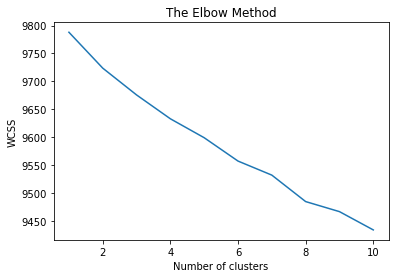

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    ############ 第四题 ～ 1行 （初始化 KMeans） ############ 
    ############ your code start ############  
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    ############ your code end ############
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
# argsort 使用方法详见： https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : polic, plan, new, govt, win, council, iraqi, say, claim, warn, baghdad, report, fund, urg, world, kill, water, nsw, death, rain, cup, set, open, continu, lead
1 : man, charg, face, murder, court, polic, stab, jail, death, assault, miss, car, accid, arrest, hospit, u, search, attack, fraud, child, guilti, sex, drug, fatal, offenc
2 : iraq, war, protest, anti, say, howard, pm, ralli, missil, troop, deni, post, blair, bush, warn, downer, forc, fear, plan, destroy, condemn, turkey, student, oil, bomb


In [39]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : war, council, protest, anti, howard, pm, ralli, student, secur, fund, march, urg, fear, thousand, peac, elect, day, say, land, polic, continu, end, open, seek, melbourn
1 : polic, govt, win, new, iraqi, say, claim, warn, baghdad, report, kill, world, nsw, urg, death, fund, rain, cup, set, lead, crash, water, open, court, continu
2 : man, charg, murder, court, face, polic, stab, jail, miss, death, assault, arrest, u, search, accid, hospit, car, attack, die, plane, injur, fatal, sex, convict, child
3 : iraq, war, say, missil, troop, howard, deni, post, blair, bush, destroy, pm, bomb, report, attack, forc, british, kill, turkey, aid, warn, resolut, blix, uk, kuwait
4 : plan, water, shire, council, new, park, war, protest, govt, union, manag, firm, green, begin, group, m, welcom, merger, defend, health, rail, land, farmer, station, burn


In [40]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : iraq, man, plan, new, govt, council, iraqi, claim, charg, report, kill, baghdad, urg, water, face, court, world, fund, set, death, rain, troop, crash, hospit, continu
1 : polic, probe, man, arrest, search, death, investig, murder, charg, drug, stab, wa, cannabi, station, fatal, car, miss, victim, protest, road, suspect, driver, nt, corrupt, crash
2 : nsw, welcom, coalit, govt, elect, pledg, promis, poll, fund, nat, leader, baghdad, plan, parti, iraqi, green, council, mp, drought, labor, opp, polici, relief, boost, rain
3 : say, warn, iraq, issu, troop, iraqi, korea, pont, govt, baghdad, travel, attack, need, ban, replac, mp, syria, act, dope, threat, union, nuclear, crean, bomb, pm
4 : win, lead, season, fan, m, goal, india, award, open, hope, tiger, championship, world, gold, return, titl, thriller, cup, coast, stage, streak, best, case, celebr, waratah
5 : war, protest, anti, iraq, howard, ralli, pm, post, plan, student, say, fear, condemn, iraqi, market, thousand, march, bush, d

In [41]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : new, council, iraqi, claim, warn, world, baghdad, rain, fund, water, urg, set, cup, death, nsw, open, hope, lead, concern, continu, final, ban, hit, meet, forc
1 : say, iraq, war, troop, iraqi, pm, baghdad, downer, crean, need, bomb, korea, group, minist, parti, raid, meet, bush, attack, fund, miss, soldier, warn, make, tour
2 : iraq, report, missil, troop, baghdad, destroy, pm, aid, deni, blair, british, howard, blix, case, tv, forc, attack, kuwait, resolut, aust, oil, reject, turkey, warn, secur
3 : govt, vic, nsw, sa, urg, fund, qld, wa, local, consid, claim, reject, fed, nt, tas, reform, deni, opp, hospit, plan, defend, review, issu, crean, announc
4 : plan, water, shire, council, new, park, manag, protest, firm, begin, group, m, welcom, defend, health, green, farmer, station, burn, concern, union, war, carr, meet, merger
5 : war, protest, anti, iraq, howard, ralli, pm, post, student, fear, condemn, market, thousand, march, bush, deni, iraqi, start, stage, peac, open, melbourn,